In [1]:
using PyPlot

### Color and Dashtype for parameter variation

In [16]:
## make function

f1(freq,x) = cos(x - freq)

f1 (generic function with 1 method)

In [17]:
## mesh
const xmin = 0.0
const xmax = 2π
const nx = 100
xs = range(xmin,length=nx,stop=xmax);

In [28]:
dashtype = ["-", "--", "--.", ":"];

In [29]:
freq = [0.0, 0.2π, 0.4π, 0.6π];

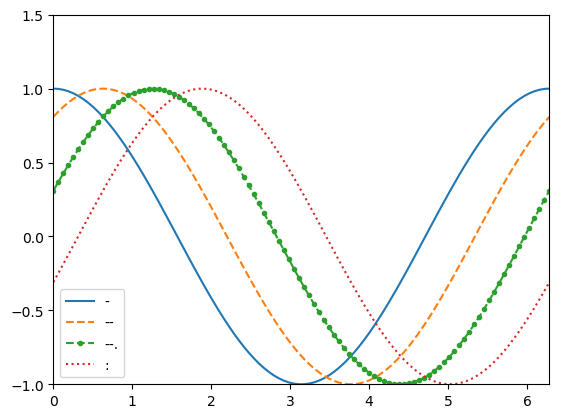

In [36]:
for (ifr, fr) in enumerate(freq)
    plt.plot(xs,f1.(fr,xs),dashtype[ifr],label = dashtype[ifr])
end
plt.ylim(-1.0,1.5)
plt.xlim(xmin,xmax)
plt.legend()
plt.show()

In [77]:
#energy mesh
const ωmin = -4.0
const ωmax = 4.0
nω = 2^12
ωs = range(ωmin,length=nω,ωmax)

#k_B unit
const kB = 8.61733034e-5;

In [78]:
#fermi distribution
function fermi(ω::Float64,T::Float64)
    if T==0
        if ω <= 0
            return 1.0
        else
            return 0.0
        end
    else
        β = 1. / kB / T
        return 1. ./ ( exp(ω*β) + 1.)
    end
end

fermi (generic function with 1 method)

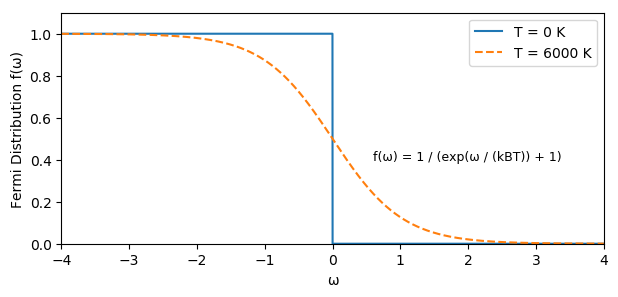

In [82]:
#temperature
Ts = [0., 6000.] #Kelvin
dashtype = ["-","--"]
labels = ["T = 0 K", "T = 6000 K"]

plt.figure(1,(7,3))
for (iT,T) in enumerate(Ts)
    plt.plot(ωs,fermi.(ωs,T),dashtype[iT],label=labels[iT])
end
plt.xlim(-4,4)
plt.ylim(0,1.1)
plt.ylabel("Fermi Distribution f(ω)")
plt.xlabel("ω")
plt.text(0.6,0.4,"f(ω) = 1 / (exp(ω / (kBT)) + 1)",fontsize=9)
plt.legend()
plt.savefig("fermi.pdf",format="pdf")

In [95]:
xv = fermi.(ωs,Ts[2])

xv1 = zeros(Float64,length(xv))
@time for (ixv,_) in enumerate(xv)
    if ixv < length(xv)
        xv1[ixv] = xv[ixv+1]
    else
        xv1[ixv] = xv1[ixv-1]
    end
end

  0.001187 seconds (27.65 k allocations: 688.063 KiB)


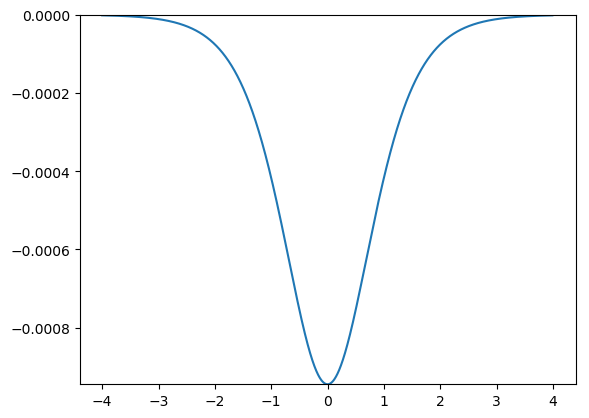

In [98]:
drv = xv1 .- xv
plt.plot(ωs,drv)
plt.ylim(minimum(drv),maximum(drv))
plt.show()